Model Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 5]              55
              ReLU-2                 [-1, 1, 5]               0
            Linear-3                 [-1, 1, 2]              12
           Softmax-4                 [-1, 1, 2]               0
Total params: 67
Trainable params: 67
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


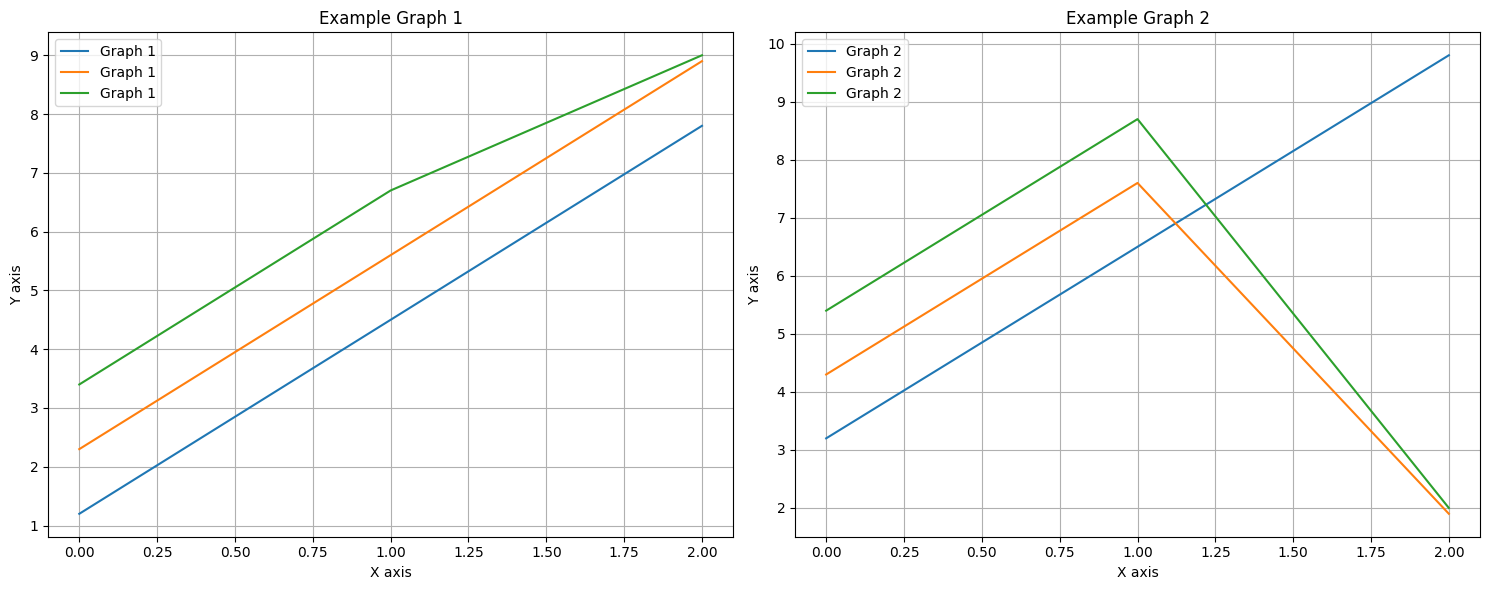

In [18]:
import matplotlib.pyplot as plt
import torch
from torchsummary import summary

class GraphData:
    def __init__(self, data_list, graph_name, graph_label, x_label=None, y_label=None):
        self.data_list = data_list  # Список пар (список float, имя)
        self.graph_name = graph_name  # Имя графика
        self.graph_label = graph_label  # Подпись к графику
        self.x_label = x_label  # Название оси X
        self.y_label = y_label  # Название оси Y

    def __str__(self):
        return f"GraphData: {self.graph_name}, Label: {self.graph_label}, Data: {self.data_list}"



class GraphPlotter:
    def __init__(self, num_columns=1):
        self.num_columns = num_columns

    def plot_graphs(self, graph_data_list, model=None, save_path=None):
        if model is not None:
            self.print_model_info(model)

        num_graphs = len(graph_data_list)
        num_rows = (num_graphs + self.num_columns - 1) // self.num_columns  # Вычисляем количество строк

        fig, axes = plt.subplots(num_rows, self.num_columns, figsize=(15, 6 * num_rows))  # Создаем холст с несколькими графиками

        for idx, (graph_data, ax) in enumerate(zip(graph_data_list, axes.flat)):
            for data, name in graph_data.data_list:
                ax.plot(data, label=name)  # Добавляем данные на график с подписью

            ax.set_title(graph_data.graph_name)  # Заголовок графика
            ax.set_xlabel(graph_data.x_label)  # Название оси X
            ax.set_ylabel(graph_data.y_label)  # Название оси Y
            ax.legend()  # Отображаем легенду
            ax.grid(True)  # Включаем сетку

        plt.tight_layout()  # Автоматическое выравнивание графиков на холсте

        if save_path:
            plt.savefig(save_path)  # Сохраняем график, если указан путь к файлу
            plt.close()  # Закрываем текущее изображение

        plt.show()  # Показываем график в блокноте

    def print_model_info(self, model):
        print("Model Summary:")
        summary(model, (1, 10))  # Выводим информацию о модели

# Пример использования:
data1 = [[1.2, 2.3, 3.4], [4.5, 5.6, 6.7], [7.8, 8.9, 9.0]]
name1 = "Graph 1"
x_label1 = "X axis"
y_label1 = "Y axis"
data2 = [[3.2, 4.3, 5.4], [6.5, 7.6, 8.7], [9.8, 1.9, 2.0]]
name2 = "Graph 2"
x_label2 = "X axis"
y_label2 = "Y axis"
data3 = [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]
name3 = "Graph 3"
x_label3 = "X axis"
y_label3 = "Y axis"
data4 = [[2.0, 3.0, 4.0], [5.0, 6.0, 7.0], [8.0, 9.0, 10.0]]
name4 = "Graph 4"
x_label4 = "X axis"
y_label4 = "Y axis"
data5 = [[0.5, 1.5, 2.5], [3.5, 4.5, 5.5], [6.5, 7.5, 8.5]]
name5 = "Graph 5"
x_label5 = "X axis"
y_label5 = "Y axis"

graph_data1 = GraphData([(data1, name1)], "Example Graph 1", "Example Label 1", x_label1, y_label1)
graph_data2 = GraphData([(data2, name2)], "Example Graph 2", "Example Label 2", x_label2, y_label2)
graph_data3 = GraphData([(data3, name3)], "Example Graph 3", "Example Label 3", x_label3, y_label3)
graph_data4 = GraphData([(data4, name4)], "Example Graph 4", "Example Label 4", x_label4, y_label4)
graph_data5 = GraphData([(data5, name5)], "Example Graph 5", "Example Label 5", x_label5, y_label5)


# Создаем модель для примера
model = nn.Sequential(
    nn.Linear(10, 5),
    nn.ReLU(),
    nn.Linear(5, 2),
    nn.Softmax(dim=1)
)

plotter = GraphPlotter(num_columns=2)  # Устанавливаем количество столбцов
plotter.plot_graphs([graph_data1, graph_data2], model=model)
